# Exercise

# Importing the relevant Libraries

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Loading the Raw Data

In [66]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

# Preprocessing

# Exploring the descriptive statistics of the variables

In [67]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

# Determining the variables of interest

In [68]:
data = data.drop(['Model'],axis=1)
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

# Dealining with Missing Values

In [69]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [70]:
data_no_mv = data.dropna(axis=0)

In [71]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

# Exploring the PDF

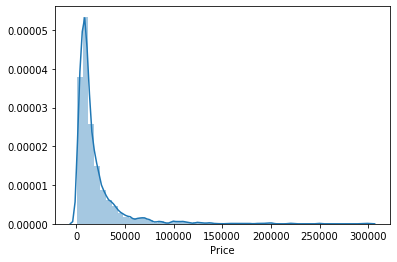

In [72]:
sns.distplot(data_no_mv['Price'])

# Dealing with Outliers

In [73]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

In [74]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

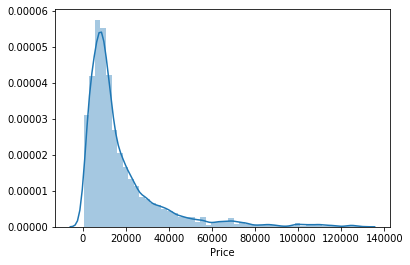

In [75]:
sns.distplot(data_1['Price'])

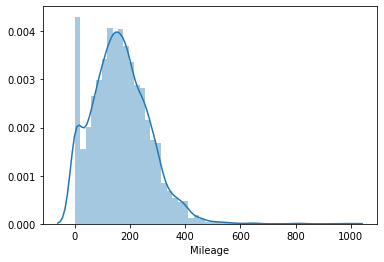

In [76]:
sns.distplot(data_1['Mileage'])

In [77]:
q = data_1['Mileage'].quantile(0.99)
data_1 = data_1[data_1['Mileage']< q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3944    3944.000000   3944  3944.000000  3944.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           867            NaN   1511          NaN          NaN   
mean           NaN   17933.880822    NaN   161.484026     2.747612   
std            NaN   19008.212025    NaN    96.027108     4.980406   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21376.250000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000    99.990000   

       Engine Type Registration         Year  
count         3944         3944  3944.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1825         3576          NaN  
mean           NaN          NaN  2006.389959  
std            NaN          NaN     6.595986  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

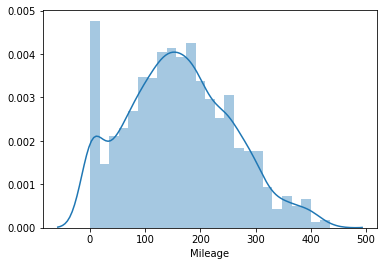

In [78]:
sns.distplot(data_1['Mileage'])

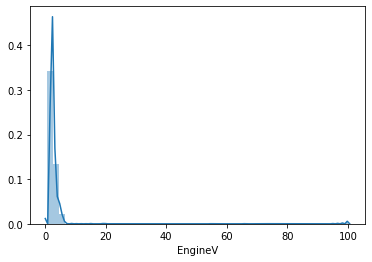

In [79]:
sns.distplot(data_1['EngineV'])

In [80]:
data_3 = data_1[data_1['EngineV']<6.5]
data_3.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3921    3921.000000   3921  3921.000000  3921.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           862            NaN   1499          NaN          NaN   
mean           NaN   17988.421311    NaN   161.279776     2.443497   
std            NaN   19041.658686    NaN    96.068269     0.946198   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21500.000000    NaN   229.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3921         3921  3921.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1818         3559          NaN  
mean           NaN          NaN  2006.406019  
std            NaN          NaN     6.595871  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

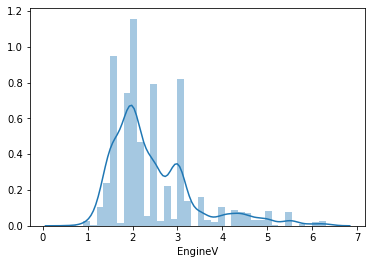

In [81]:
sns.distplot(data_3['EngineV'])

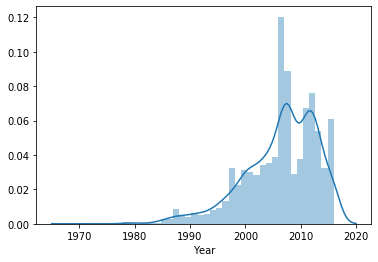

In [82]:
sns.distplot(data_3['Year'])

In [107]:
q = data_3['Year'].quantile(0.01)
data_cleaned = data_3[data_3['Year']>q]
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

# Checking the OLS Assumptions

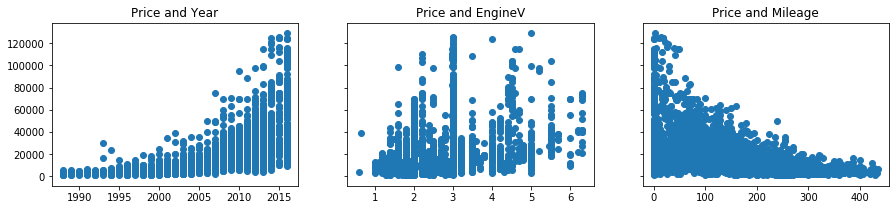

In [84]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("Price and EngineV")

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

# Relaxing the assumptions

In [114]:
#log_price = np.log(data_cleaned['Price'])
#data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277     2.00      Petrol   
1     Mercedes-Benz    7900.0        van      427     2.90      Diesel   
2     Mercedes-Benz   13300.0      sedan      358     5.00         Gas   
3              Audi   23000.0  crossover      240     4.20      Petrol   
4            Toyota   18300.0  crossover      120     2.00      Petrol   
7              Audi   14200.0      vagon      200     2.70      Diesel   
8           Renault   10799.0      vagon      193     1.50      Diesel   
9        Volkswagen    1400.0      other      212     1.80         Gas   
10          Renault   11950.0      vagon      177     1.50      Diesel   
11          Renault    2500.0      sedan      260     1.79      Petrol   
12             Audi    9500.0      vagon      165     2.70         Gas   
13       Volkswagen   10500.0      sedan      100     1.80      Petrol   
14           Toyota   16000.0  crossover      250     4.70         Gas   
15          Renault    8600.0      hatch       84     1.50      Diesel   
16              BMW    2990.0      other      203     2.00      Petrol   
18           Toyota   26500.0  crossover       21     2.00      Petrol   
19             Audi    3500.0      vagon      250     2.50      Diesel   
20           Toyota   38233.0      other        0     2.40      Diesel   
21       Volkswagen    7500.0      hatch      132     1.40      Diesel   
22             Audi    6800.0      sedan      225     2.40         Gas   
23       Mitsubishi   10500.0  crossover      130     2.40         Gas   
24             Audi   24900.0      sedan      163     4.20      Diesel   
25       Volkswagen   20800.0  crossover      151     3.00      Diesel   
26             Audi    6500.0      sedan      330     2.40      Petrol   
27    Mercedes-Benz   13566.0      other      171     2.20       Other   
28       Mitsubishi    8500.0      hatch       65     1.30      Petrol   
30             Audi    2900.0      sedan        1     2.30         Gas   
31              BMW   21500.0      other       72     3.00      Petrol   
32       Mitsubishi   17900.0  crossover       87     3.80         Gas   
33              BMW   28500.0  crossover      160     4.80         Gas   
...             ...       ...        ...      ...      ...         ...   
4309  Mercedes-Benz   11500.0        van      180     2.20      Diesel   
4310     Mitsubishi    9700.0        van      247     2.40         Gas   
4311        Renault   10500.0      vagon      185     1.50      Diesel   
4312        Renault   10900.0      vagon      180     1.50      Diesel   
4314  Mercedes-Benz   25500.0  crossover       77     3.50      Petrol   
4315     Volkswagen   15500.0      sedan       80     1.40      Petrol   
4316     Volkswagen    9750.0        van      159     1.90      Diesel   
4317            BMW   16100.0  crossover      194     3.00      Diesel   
4320     Volkswagen    9200.0      vagon      171     1.60      Petrol   
4321     Volkswagen    5150.0        van      240     2.00      Diesel   
4322         Toyota  100000.0  crossover        0     4.50      Diesel   
4323        Renault    8999.0      other      126     2.00      Diesel   
4324  Mercedes-Benz   16800.0      sedan      125     1.80      Petrol   
4325  Mercedes-Benz    8200.0      sedan      280     2.40         Gas   
4326  Mercedes-Benz   24950.0      other       60     1.80      Petrol   
4327           Audi   80999.0  crossover        0     3.00      Diesel   
4328  Mercedes-Benz    7300.0        van      207     2.20      Diesel   
4330            BMW   21335.0      other      105     3.00      Petrol   
4331            BMW   45000.0  crossover       80     3.00      Petrol   
4332        Renault    6750.0        van      155     1.50      Diesel   
4333        Renault    7000.0        van      210     1.50      Diesel   
4334            BMW   12090.0      hatch      145     1.60      Petrol   
4335            BM

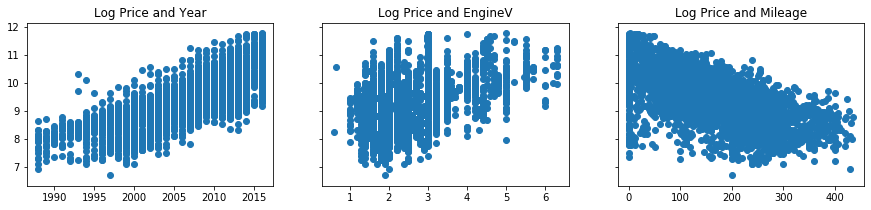

In [116]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("Log Price and Year")

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("Log Price and EngineV")

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title("Log Price and Mileage")

plt.show()

In [122]:

data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277     2.00      Petrol          yes   
1     Mercedes-Benz        van      427     2.90      Diesel          yes   
2     Mercedes-Benz      sedan      358     5.00         Gas          yes   
3              Audi  crossover      240     4.20      Petrol          yes   
4            Toyota  crossover      120     2.00      Petrol          yes   
7              Audi      vagon      200     2.70      Diesel          yes   
8           Renault      vagon      193     1.50      Diesel          yes   
9        Volkswagen      other      212     1.80         Gas           no   
10          Renault      vagon      177     1.50      Diesel          yes   
11          Renault      sedan      260     1.79      Petrol          yes   
12             Audi      vagon      165     2.70         Gas          yes   
13       Volkswagen      sedan      100     1.80      Petrol          yes   
14           Toyota  crossover      250     4.70         Gas          yes   
15          Renault      hatch       84     1.50      Diesel          yes   
16              BMW      other      203     2.00      Petrol           no   
18           Toyota  crossover       21     2.00      Petrol          yes   
19             Audi      vagon      250     2.50      Diesel           no   
20           Toyota      other        0     2.40      Diesel          yes   
21       Volkswagen      hatch      132     1.40      Diesel          yes   
22             Audi      sedan      225     2.40         Gas          yes   
23       Mitsubishi  crossover      130     2.40         Gas          yes   
24             Audi      sedan      163     4.20      Diesel          yes   
25       Volkswagen  crossover      151     3.00      Diesel          yes   
26             Audi      sedan      330     2.40      Petrol          yes   
27    Mercedes-Benz      other      171     2.20       Other           no   
28       Mitsubishi      hatch       65     1.30      Petrol          yes   
30             Audi      sedan        1     2.30         Gas          yes   
31              BMW      other       72     3.00      Petrol          yes   
32       Mitsubishi  crossover       87     3.80         Gas          yes   
33              BMW  crossover      160     4.80         Gas          yes   
...             ...        ...      ...      ...         ...          ...   
4309  Mercedes-Benz        van      180     2.20      Diesel          yes   
4310     Mitsubishi        van      247     2.40         Gas          yes   
4311        Renault      vagon      185     1.50      Diesel          yes   
4312        Renault      vagon      180     1.50      Diesel          yes   
4314  Mercedes-Benz  crossover       77     3.50      Petrol          yes   
4315     Volkswagen      sedan       80     1.40      Petrol          yes   
4316     Volkswagen        van      159     1.90      Diesel          yes   
4317            BMW  crossover      194     3.00      Diesel          yes   
4320     Volkswagen      vagon      171     1.60      Petrol          yes   
4321     Volkswagen        van      240     2.00      Diesel          yes   
4322         Toyota  crossover        0     4.50      Diesel          yes   
4323        Renault      other      126     2.00      Diesel          yes   
4324  Mercedes-Benz      sedan      125     1.80      Petrol          yes   
4325  Mercedes-Benz      sedan      280     2.40         Gas          yes   
4326  Mercedes-Benz      other       60     1.80      Petrol          yes   
4327           Audi  crossover        0     3.00      Diesel          yes   
4328  Mercedes-Benz        van      207     2.20      Diesel          yes   
4330            BMW      other      105     3.00      Petrol          yes   
4331            BMW  crossover       80     3.00      Petrol          yes   
4332        Renault        van      155     1.50      Diesel          yes   
4333      

In [123]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [124]:
# Let's explore the result
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [125]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

# Create Dummy Variables

In [127]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

# Rearrange a bit

In [130]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [134]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [140]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

# Linear Regression Model

In [143]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [145]:
targets.head()

0     8.342840
1     8.974618
2     9.495519
3    10.043249
4     9.814656
Name: log_price, dtype: float64

In [147]:
inputs.head()

Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
0      277      2.0          1                    0                 0   
1      427      2.9          0                    1                 0   
2      358      5.0          0                    1                 0   
3      240      4.2          0                    0                 0   
4      120      2.0          0                    0                 0   

   Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch  Body_other  \
0              0             0                 0           0           0   
1              0             0                 0           0           0   
2              0             0                 0           0           0   
3              0             0                 0           0           0   
4              0             1                 0           0           0   

   Body_sedan  Body_vagon  Body_van  Engine Type_Gas  Engine Type_Other  \
0           1           0         0                0                  0   
1           0           0         1                0                  0   
2           1           0         0                1                  0   
3           0           0         0                0                  0   
4           0           0         0                0                  0   

   Engine Type_Petrol  Registration_yes  
0                   1                 1  
1                   0                 1  
2                   0                 1  
3                   1                 1  
4                   1                 1

# Import the scaling module

In [148]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
input_scaled = scaler.transform(inputs)
input_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

# Import Train Test split 

In [153]:
from sklearn.model_selection import train_test_split

In [251]:
x_train, x_test, y_train, y_test= train_test_split(input_scaled,targets, test_size=0.2, random_state=365)

In [252]:
x_train, x_test

(array([[ 0.25577519, -1.106607  , -0.43865069, ..., -0.16209221,
          1.33267512,  0.32137366],
        [-0.86322675, -1.00125996, -0.43865069, ..., -0.16209221,
         -0.75037043,  0.32137366],
        [-0.4344503 , -0.47452478, -0.43865069, ..., -0.16209221,
         -0.75037043,  0.32137366],
        ...,
        [ 0.64271979,  3.21262147, -0.43865069, ..., -0.16209221,
          1.33267512,  0.32137366],
        [ 1.24928159,  0.05221039, -0.43865069, ...,  6.16932785,
         -0.75037043, -3.11164272],
        [-0.58086177, -0.47452478, -0.43865069, ..., -0.16209221,
         -0.75037043,  0.32137366]]),
 array([[ 1.45844083,  0.57894557, -0.43865069, ..., -0.16209221,
         -0.75037043,  0.32137366],
        [ 0.62180387, -0.15848368, -0.43865069, ..., -0.16209221,
          1.33267512, -3.11164272],
        [-0.58086177, -1.106607  , -0.43865069, ..., -0.16209221,
          1.33267512,  0.32137366],
        ...,
        [-1.36520892, -0.89591293, -0.43865069, ..., -

In [253]:
y_train, y_test

(2080     9.367344
 3897     9.159047
 1962     9.350102
 2533     9.375855
 148      9.539644
 4185     8.160518
 4031     9.433484
 3002     8.294050
 2563     8.691146
 3705     7.824046
 2195     9.457200
 780      9.472705
 2956    10.264652
 72       9.104980
 1353     8.465900
 2040     8.476371
 3400     8.039157
 905      8.318742
 2100     9.011889
 1998     8.517193
 408      9.429476
 119     10.753638
 2775    10.532096
 862      9.305560
 86       8.817298
 25       9.942708
 2911     9.277999
 215      8.242756
 1929    11.232616
 2814    10.196157
           ...    
 2192     9.792556
 2461     7.882315
 2133     8.867850
 2821     9.769956
 4302     8.779557
 1297     8.389360
 2785    11.608227
 3966     9.581904
 712      9.852194
 4323     9.104869
 4171     9.933046
 1043    10.502324
 2882     8.575462
 3425     9.350102
 2119     8.188689
 3290    11.769287
 1756     9.615805
 1780     9.392662
 330      8.160518
 1499     7.972466
 742      8.824678
 372      9.

# Create the Regression

In [254]:
reg = LinearRegression()

In [255]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
y_hat = reg.predict(x_train)

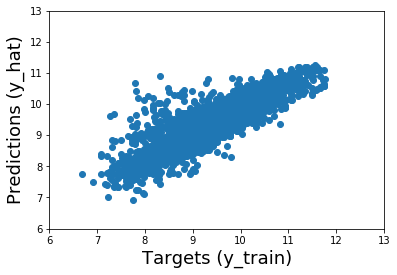

In [257]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


Text(0.5, 1.0, 'Residuals')

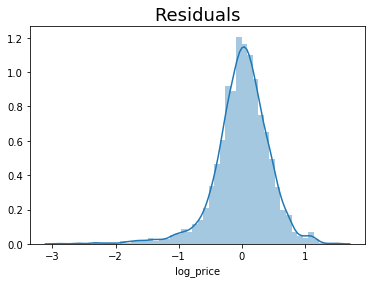

In [258]:
sns.distplot(y_train-y_hat)
plt.title("Residuals", size = 18)

In [259]:
reg.score(x_train,y_train)

0.744996578792662

# Find the Bias and Weights

In [260]:
reg.intercept_

9.415239458021299

In [261]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [262]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

In [263]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [264]:
y_hat_test = reg.predict(x_test)

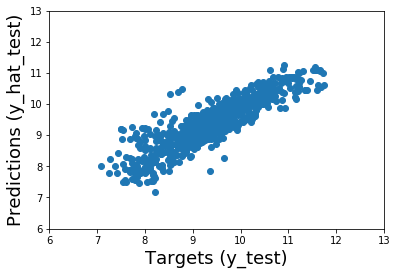

In [265]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [266]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [267]:
df_pf['Target'] = np.exp(y_test)
df_pf['Target'].head()

0       NaN
1    7900.0
2       NaN
3       NaN
4       NaN
Name: Target, dtype: float64

In [268]:
df_pf['Target'] = np.exp(y_test).reset_index(drop=True)
df_pf['Target'].head()

0    2300.0
1    2800.0
2    2500.0
3    6400.0
4    9150.0
Name: Target, dtype: float64

In [269]:
df_pf.head()

Prediction  Target
0  10685.501696  2300.0
1   3499.255242  2800.0
2   7553.285218  2500.0
3   7463.963017  6400.0
4  11353.490075  9150.0

In [270]:
df_pf['Residuals'] = df_pf['Prediction'] - df_pf['Target']

In [276]:
df_pf['Residuals %'] = np.absolute((df_pf['Prediction'] - df_pf['Target'])/df_pf['Target']*100)

In [277]:
df_pf.head()

Prediction  Target  Residuals  Residuals %
0    10685.50 2300.00    8385.50       364.59
1     3499.26 2800.00     699.26        24.97
2     7553.29 2500.00    5053.29       202.13
3     7463.96 6400.00    1063.96        16.62
4    11353.49 9150.00    2203.49        24.08

In [278]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Residuals %'])

Prediction    Target  Residuals  Residuals %
698    30480.85  30500.00     -19.15         0.06
742    16960.31  16999.00     -38.69         0.23
60     12469.21  12500.00     -30.79         0.25
110    25614.14  25500.00     114.14         0.45
367    42703.68  42500.00     203.68         0.48
369     3084.69   3100.00     -15.31         0.49
769    29651.73  29500.00     151.73         0.51
272     9749.53   9800.00     -50.47         0.52
714    23118.07  22999.00     119.07         0.52
630     8734.58   8800.00     -65.42         0.74
380     3473.79   3500.00     -26.21         0.75
648    21174.10  21335.00    -160.90         0.75
308     8967.74   8900.00      67.74         0.76
665    17858.02  18000.00    -141.98         0.79
379    17654.84  17800.00    -145.16         0.82
719    11391.95  11500.00    -108.05         0.94
102    28625.56  28900.00    -274.44         0.95
94      7724.17   7800.00     -75.83         0.97
561     6429.03   6500.00     -70.97         1.09
242     7597.39   7500.00      97.39         1.30
528    18555.09  18800.00    -244.91         1.30
61      7396.87   7300.00      96.87         1.33
19     16178.14  16400.00    -221.86         1.35
280    12327.10  12499.00    -171.90         1.38
311    51287.19  52055.25    -768.06         1.48
723     6009.63   6100.00     -90.37         1.48
49      4973.17   4900.00      73.17         1.49
114    27716.14  27300.00     416.14         1.52
636    28498.91  28950.00    -451.09         1.56
612     2953.17   3000.00     -46.83         1.56
47     26425.14  25999.00     426.14         1.64
23     13111.91  12900.00     211.91         1.64
31     12858.08  12650.00     208.08         1.64
91     13421.16  13200.00     221.16         1.68
329     7327.18   7200.00     127.18         1.77
549     3816.33   3750.00      66.33         1.77
252     9721.50   9900.00    -178.50         1.80
387    44173.72  44999.00    -825.28         1.83
267    40753.58  40000.00     753.58         1.88
467    22262.80  22711.65    -448.85         1.98
556    18231.44  18600.00    -368.56         1.98
165     9596.94   9400.00     196.94         2.10
259     6067.79   6200.00    -132.21         2.13
601    35371.16  34600.00     771.16         2.23
708    11967.39  11700.00     267.39         2.29
593    17908.00  17500.00     408.00         2.33
398     8707.13   8500.00     207.13         2.44
526    29049.27  28350.00     699.27         2.47
603    14513.46  14900.00    -386.54         2.59
53     20453.89  21000.00    -546.11         2.60
632    15383.35  14990.00     393.35         2.62
533    24642.50  24000.00     642.50         2.68
497    50099.92  51500.00   -1400.08         2.72
212    16133.86  15700.00     433.86         2.76
130    17489.92  18000.00    -510.08         2.83
290     1894.40   1950.00     -55.60         2.85
78     30810.25  29900.00     910.25         3.04
642     8721.97   8999.00    -277.03         3.08
437    18866.50  18300.00     566.50         3.10
101     5958.63   6150.00    -191.37         3.11
314     5811.74   6000.00    -188.26         3.14
150     9800.43   9500.00     300.43         3.16
565     7324.63   7100.00     224.63         3.16
574    12583.52  13000.00    -416.48         3.20
591    10115.13   9800.00     315.13         3.22
172    11156.38  10800.00     356.38         3.30
133     9279.28   9600.00    -320.72         3.34
480    31369.37  32500.00   -1130.63         3.48
87      2315.71   2400.00     -84.29         3.51
11      5175.77   5000.00     175.77         3.52
43     21611.83  22400.00    -788.17         3.52
96      7976.26   7700.00     276.26         3.59
406    24874.86  23999.00     875.86         3.65
173    36516.35  37900.00   -1383.65         3.65
540     4666.05   4500.00     166.05         3.69
40     18672.68  18000.00     672.68         3.74
340    14815.83  15400.00    -584.17         3.79
239    10581.62  10999.00    -417.38         3.79
109    12663.54  12200.00     463.54         3.80
256  

In [279]:
df_pf.describe()

Prediction    Target  Residuals  Residuals %
count      774.00    774.00     774.00       774.00
mean     15946.76  18165.82   -2219.06        36.26
std      13133.20  19967.86   10871.22        55.07
min       1320.56   1200.00  -85106.16         0.06
25%       7413.64   6900.00   -3147.34        12.11
50%      11568.17  11600.00    -142.52        23.47
75%      20162.41  20500.00    2044.19        39.56
max      77403.06 126000.00   29456.50       512.69